Importing Libraries

In [2]:
import tensorflow as tf #library for training machine learning models and deep learning
import matplotlib.pyplot as plt #plotting library in python (for graphs)

## Data Pre-Processing

Training Image Pre-Processing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\7th sem project\Machine learning part\dataset\train",
    labels = "inferred", # it is like tags for each value(a,b,c 12,23) based on folder names
    label_mode = "categorical", #vector representation
    class_names = None, 
    color_mode = "grayscale", # means the images are in black and white
    batch_size = 32, #process 32 image at one time 
    image_size = (24, 24), # image pixel size is 24*24
    shuffle = True, #mixes image everytime when it trains
    seed = 42, # helps in randomization
    validation_split = 0.2, #20% image lai testing ma rakheko
    subset = "training", # yo purai lai "keyword" le denote gareko
    interpolation = "bilinear", # resizing 
    crop_to_aspect_ratio = False, #whether to crop the image or not 
)

Found 13640 files belonging to 62 classes.
Using 10912 files for training.


Validation Image Pre-Processing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'D:\7th sem project\Machine learning part\dataset\validate',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(24, 24),
    shuffle=True,
    seed=42, 
    validation_split=0.2,  
    subset="validation", 
    interpolation="bilinear",
    crop_to_aspect_ratio=False
)

Found 2728 files belonging to 62 classes.
Using 545 files for validation.


# Model Building

In [5]:
learn = tf.keras.models.Sequential() # blueprint layer while building model

Building convulation layer

In [6]:
# 1st convolutional layer
learn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(24, 24, 1)))
# Uses 32 different filters to look for patterns in the image
# Each filter is a small 3x3 pixel square
# Padding='same' keeps the output image size the same as the input size
# ReLU activation helps the model learn complex patterns by introducing non-linearity

# 2nd convolutional layer
learn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
# Again uses 32 filters to find additional patterns in the image
# Each filter is a 3x3 pixel square
# This layer will process the output of the previous convolutional layer

# Max pooling layer
learn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Reduces the size of the image by summarizing 2x2 blocks into a single value
# The filter moves by 2 pixels each time, making the image smaller and more manageable
# This helps to keep only the most important information and reduces computation



c:\Users\bitte\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Dropout to prevent overfitting
learn.add(tf.keras.layers.Dropout(0.25))

In [8]:
# Flattening layer
learn.add(tf.keras.layers.Flatten()) 

In [9]:
#Fully connected layers
learn.add(tf.keras.layers.Dense(units = 512, activation='relu'))
learn.add(tf.keras.layers.Dense(units = 256, activation='relu'))

#Dropout layers
learn.add(tf.keras.layers.Dropout(0.5))

#Output layer
learn.add(tf.keras.layers.Dense(units =62, activation='softmax')) # multiclas classification ko lagi 


In [10]:
# Compiling the model

learn.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])

# Model Summary


In [11]:
learn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,982,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 62)             │        15,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,139,806 (8.16 MB)

 Trainable params: 2,139,806 (8.16 MB)

 Non-trainable params: 0 (0.00 B)

## Evaluating the model

In [12]:
# Train the model
training_history = learn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=5
)


Epoch 1/5
341/341 ━━━━━━━━━━━━━━━━━━━━ 41s 115ms/step - accuracy: 0.0187 - loss: 8.7371 - val_accuracy: 0.0495 - val_loss: 3.9933
Epoch 2/5
341/341 ━━━━━━━━━━━━━━━━━━━━ 27s 79ms/step - accuracy: 0.0422 - loss: 3.9796 - val_accuracy: 0.0716 - val_loss: 3.7388
Epoch 3/5
341/341 ━━━━━━━━━━━━━━━━━━━━ 26s 77ms/step - accuracy: 0.0642 - loss: 3.7734 - val_accuracy: 0.0936 - val_loss: 3.5315
Epoch 4/5
341/341 ━━━━━━━━━━━━━━━━━━━━ 27s 80ms/step - accuracy: 0.1010 - loss: 3.5420 - val_accuracy: 0.1835 - val_loss: 3.0974
Epoch 5/5
341/341 ━━━━━━━━━━━━━━━━━━━━ 25s 74ms/step - accuracy: 0.1405 - loss: 3.2796 - val_accuracy: 0.2220 - val_loss: 2.8662


In [13]:
# training set accuracy

training_loss, training_accuracy = learn.evaluate(training_set)
print("Training Accuracy is :", training_accuracy)
print("Training loss is:", training_loss)

341/341 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.2993 - loss: 2.6233
Training Accuracy is : 0.33870968222618103
Training loss is: 2.5216119289398193


## Training Visualization


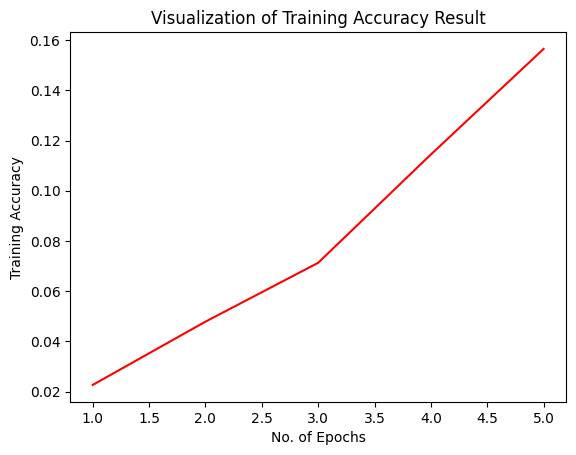

In [14]:
epochs = [i for i in range(1, 6)]
plt.plot(epochs, training_history.history['accuracy'], color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()


## Validation Accuracy


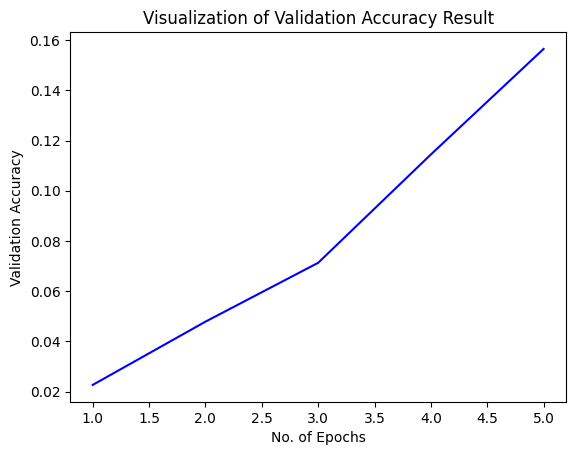

In [15]:
epochs = [i for i in range(1, 6)]
plt.plot(epochs, training_history.history['accuracy'], color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()


## Test set Evaluation

In [16]:
testing_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\7th sem project\Machine learning part\dataset\test",
    labels = "inferred", # it is like tags for each value(a,b,c 12,23) based on folder names
    label_mode = "categorical", #vector representation
    class_names = None, 
    color_mode = "grayscale", # means the images are in black and white
    batch_size = 32, #process 32 image at one time 
    image_size = (24, 24), # image pixel size is 24*24
    shuffle = True, #mixes image everytime when it trains
    seed = 42, # helps in randomization
    interpolation = "bilinear", # resizing 
    crop_to_aspect_ratio = False, #whether to crop the image or not 
)

Found 682 files belonging to 62 classes.


In [17]:
# Testing accuracy and loss of the test data

testing_loss, testing_accuracy = learn.evaluate(testing_set)
print('Test Accuracy: ', testing_accuracy)
print('Test Loss:', testing_loss)

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.1972 - loss: 2.9242
Test Accuracy:  0.2170087993144989
Test Loss: 2.9012224674224854


## Saving the model

In [24]:
learn.save("1st Iteration.keras")

In [25]:
# for training history
training_history.history

{'accuracy': [0.022635631263256073,
  0.04783724248409271,
  0.07129765301942825,
  0.11446114629507065,
  0.1565249264240265],
 'loss': [5.0111894607543945,
  3.9299871921539307,
  3.7149600982666016,
  3.462381601333618,
  3.20853590965271],
 'val_accuracy': [0.04954128339886665,
  0.07155963033437729,
  0.09357798099517822,
  0.1834862381219864,
  0.22201834619045258],
 'val_loss': [3.9932689666748047,
  3.73883056640625,
  3.531453847885132,
  3.097428798675537,
  2.8662004470825195]}

In [26]:

#Recording History in json
import json
with open('training_history.json','w') as f:
  json.dump(training_history.history,f)